In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [4]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


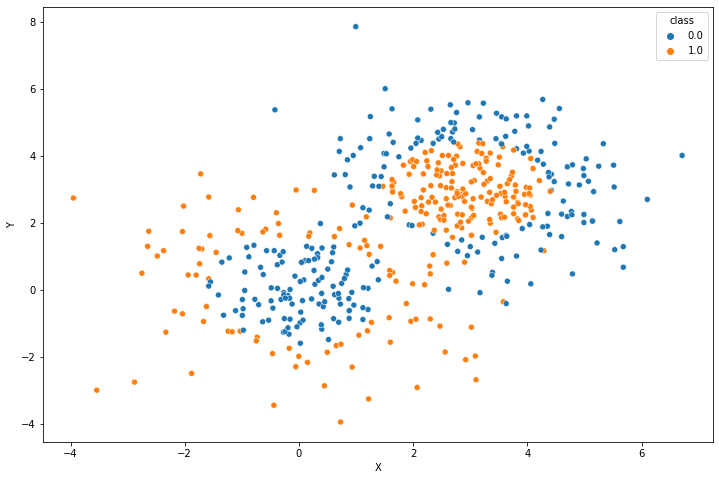

In [5]:
sns.scatterplot(circ['X'], circ['Y'], hue=circ['class']);

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

In [6]:
from sklearn.linear_model import LogisticRegression

X = circ.drop('class', axis=1)
y = circ['class']

lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [7]:
# Accuracy

print(f'Train accuracy: {lr.score(X, y)}')

Train accuracy: 0.424


In [8]:
# Параметры модели

betta0 = lr.intercept_[0]
betta1, betta2 = lr.coef_[0][0], lr.coef_[0][1]

betta0, betta1, betta2

(0.02848470383506867, -0.0031616885465116642, -0.012048324813352156)

In [9]:
# Построение разделяющей прямой 

x_vals = np.array([np.min(circ['X']), np.max(circ['Y'])])
y_vals = -(betta0 + betta1 * x_vals) / betta2

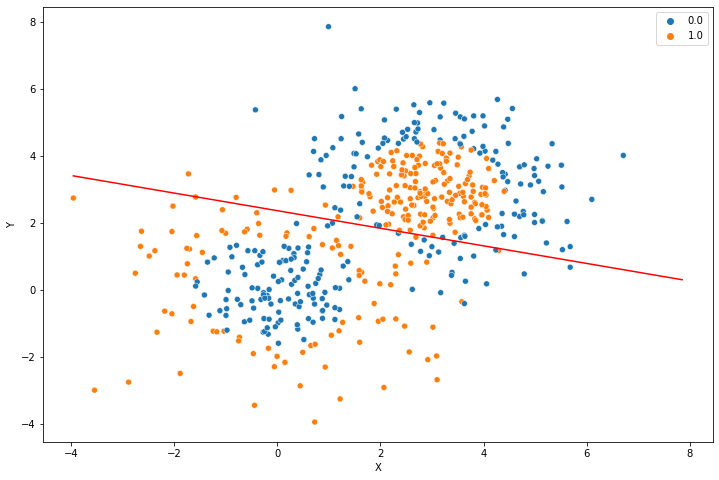

In [10]:
# Визуализация разделяющей прямой

plt.figure()
sns.scatterplot(circ['X'], circ['Y'], hue=circ['class'])
sns.lineplot(x_vals, y_vals, color='red')

plt.show()

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [11]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

all_k = [1, 3, 10, 30, 40, 60]
knn_list = []
scores_list = []

for k in all_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)
    knn_list.append(knn)
    scores_list.append(knn.score(X_test, y_test))

In [14]:
knn_list[0].n_neighbors

1

In [15]:
for model in knn_list:
    print(f'k: {model.n_neighbors}, train score: {model.score(X_train, y_train)}, test score: {model.score(X_test, y_test)}')

k: 1, train score: 1.0, test score: 0.89
k: 3, train score: 0.9475, test score: 0.87
k: 10, train score: 0.915, test score: 0.85
k: 30, train score: 0.8525, test score: 0.74
k: 40, train score: 0.8, test score: 0.75
k: 60, train score: 0.6925, test score: 0.73


**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [17]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 1.8 MB/s eta 0:00:01


In [18]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

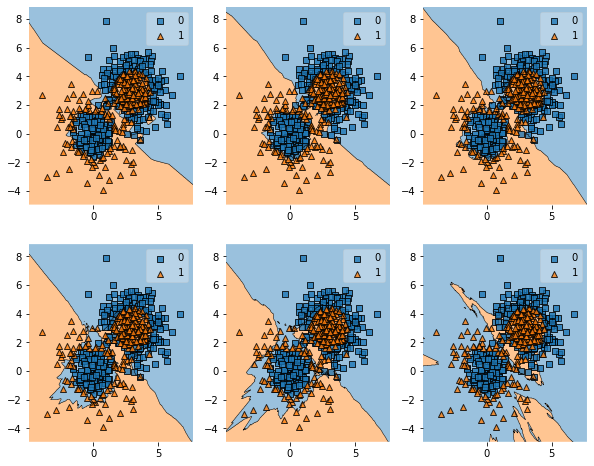

In [44]:
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(10, 8))

for model, grd in zip(knn_list, itertools.product(range(2), range(3))):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=model)
    
plt.show()

1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [45]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


for k in [1, 5, 10]:
    pipe_knn = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=k))])
    knn_class = KNeighborsClassifier(n_neighbors=k)
    
    pipe_knn.fit(X_train, y_train)
    knn_class.fit(X_train, y_train)
    
    print(f'Ошибка на тесте (отнормированные данные), k = {k}: {pipe_knn.score(X_test, y_test)}')
    print(f'Ошибка на тесте (ненормированные данные), k = {k}: {knn_class.score(X_test, y_test)}')

Ошибка на тесте (отнормированные данные), k = 1: 0.5648805681084571
Ошибка на тесте (ненормированные данные), k = 1: 0.43819542019519236
Ошибка на тесте (отнормированные данные), k = 5: 0.6303877264269168
Ошибка на тесте (ненормированные данные), k = 5: 0.44317016671097104
Ошибка на тесте (отнормированные данные), k = 10: 0.6607678578209851
Ошибка на тесте (ненормированные данные), k = 10: 0.4703603843086621


**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [50]:
pipe_knn = Pipeline([('sclaer', StandardScaler()), 
                     ('knn', KNeighborsClassifier(n_neighbors=10, p=1))])

pipe_knn.fit(X_train, y_train)
print(f'Accuracy на тесте p = 1, k = 10: {pipe_knn.score(X_test, y_test)}')

Accuracy на тесте p = 1, k = 10: 0.6611476094634109


**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [51]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


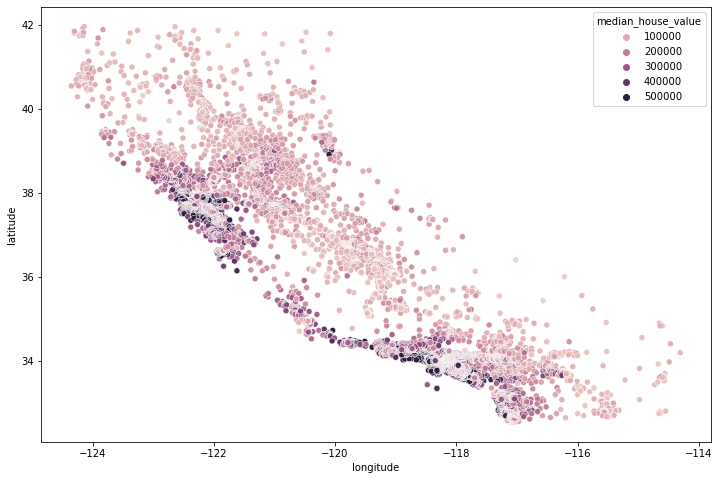

In [52]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot('longitude', 'latitude', data=X, hue=y);

In [54]:
def kernel(distances, h=1):
    
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1/2) * ((distances)**2) / h**2
    
        return const * np.exp(power)

In [56]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsRegressor(weights=<function kernel at 0x1463bb700>))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsRegressor(weights=<function kernel at 0x1463bb700>),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': <function __main__.kernel(distances, h=1)>}

In [65]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor(weights=kernel))])

param_grid = {
    'knn__n_neighbors': np.arange(10)
}

ps = PredefinedSplit([0 if x in X_train.index else -1 for x in X.index])

search = GridSearchCV(pipe, param_grid, cv=ps)

search.fit(X, y)

print(f"Best parameter (CV score = {search.best_score_:.5f}): {search.best_params_}")

Best parameter (CV score = 0.72175): {'knn__n_neighbors': 4}
{'knn__n_neighbors': 4}


In [95]:
from sklearn.metrics import mean_squared_error

for h in np.arange(0.02, 0.1, 0.01):
    
    def kernel(distances, h=h):
    
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1/2) * ((distances)**2) / h**2
    
        return const * np.exp(power)
    
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('knn', KNeighborsRegressor(n_neighbors=4, weights=kernel))])
    pipe.fit(X_train, y_train)
    
    print(f'KNN Regressor RMSLE (h = {h:.3}): {mean_squared_error(y_test, pipe.predict(X_test)) ** 0.5}')

KNN Regressor RMSLE (h = 0.02): 53689.48635368079
KNN Regressor RMSLE (h = 0.03): 53646.568587751965
KNN Regressor RMSLE (h = 0.04): 53657.050335388674
KNN Regressor RMSLE (h = 0.05): 53669.25169271904
KNN Regressor RMSLE (h = 0.06): 53678.64909084107
KNN Regressor RMSLE (h = 0.07): 53685.97402894342
KNN Regressor RMSLE (h = 0.08): 53691.626761067666
KNN Regressor RMSLE (h = 0.09): 53695.97324517459


In [96]:
from sklearn.linear_model import LinearRegression

reg_model = Pipeline([('scaler', StandardScaler()), ('LinReg', LinearRegression())])
reg_model.fit(X_train, y_train)

print(f'Linear Regressor RMSLE: {mean_squared_error(y_test, reg_model.predict(X_test)):.3}')

Linear Regressor RMSLE: 9.68e+09
